# 1. Importing packages

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
%matplotlib inline

# 2. Making Oracle

Making a Balanced Oracle and constant oracle

This part has been taken from the Qiskit textbook

In [19]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    return oracle_qc

# 3. DJ algorithm

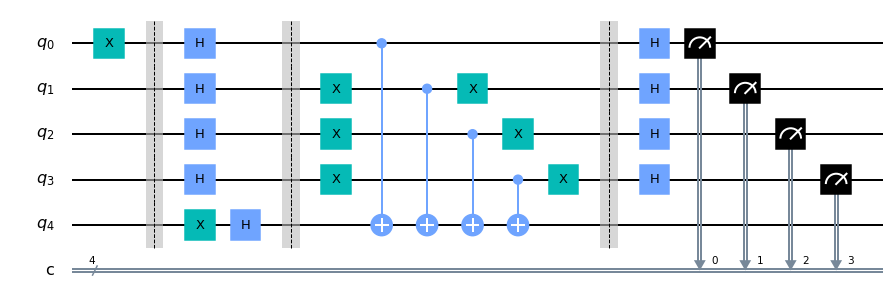

In [22]:
def state_prep(qc,state):
    for idx,s in enumerate(state):
        if s=='1':
            qc.x(idx)


n=4
qc=QuantumCircuit(n+1,n)

state_prep(qc,'100')
qc.barrier()
for q in range(n):
    qc.h(q)
qc.x(n)
qc.h(n)
qc.barrier()
oracle=dj_oracle('balanced',n)
qc+=oracle
qc.barrier()
for q in range(n):
    qc.h(q)
qc.measure(range(0,n),range(0,n))
qc.draw('mpl')

# 3. Running the Deutsch Josza Algorithm

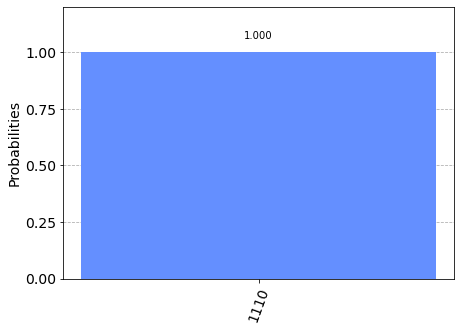

In [23]:
backend=Aer.get_backend('qasm_simulator')
result=execute(qc,backend=backend,shots=1024).result()
plot_histogram(result.get_counts())

The first n-1 qubits would give us a |1> state indicating it is a balanced function/oracle.

If we found our first n-1 qubits to be |0> then it can be said that the function/oracle is constant.